In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hand-gestures/up-samples/45.jpg
/kaggle/input/hand-gestures/up-samples/56.jpg
/kaggle/input/hand-gestures/up-samples/89.jpg
/kaggle/input/hand-gestures/up-samples/20.jpg
/kaggle/input/hand-gestures/up-samples/58.jpg
/kaggle/input/hand-gestures/up-samples/6.jpg
/kaggle/input/hand-gestures/up-samples/76.jpg
/kaggle/input/hand-gestures/up-samples/71.jpg
/kaggle/input/hand-gestures/up-samples/5.jpg
/kaggle/input/hand-gestures/up-samples/8.jpg
/kaggle/input/hand-gestures/up-samples/84.jpg
/kaggle/input/hand-gestures/up-samples/85.jpg
/kaggle/input/hand-gestures/up-samples/67.jpg
/kaggle/input/hand-gestures/up-samples/82.jpg
/kaggle/input/hand-gestures/up-samples/30.jpg
/kaggle/input/hand-gestures/up-samples/38.jpg
/kaggle/input/hand-gestures/up-samples/42.jpg
/kaggle/input/hand-gestures/up-samples/33.jpg
/kaggle/input/hand-gestures/up-samples/10.jpg
/kaggle/input/hand-gestures/up-samples/54.jpg
/kaggle/input/hand-gestures/up-samples/0.jpg
/kaggle/input/hand-gestures/up-samples

In [9]:
print(os.listdir('../input/hand-gestures'))

['up-samples', 'mid-samples', 'down-samples']


In [10]:
X=[]
Y=[]
IMG_SIZE = 150
up_dir = "../input/hand-gestures/up-samples"
mid_dir = "../input/hand-gestures/mid-samples"
down_dir = "../input/hand-gestures/down-samples"

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def create_dataset_dataframe(src_dir, test_size=0.2):
    """
    Function to create a DataFrame for image classification.
    
    Parameters:
    - src_dir: Directory containing images, organized by class (e.g., 'up-samples', 'down-samples').
    - test_size: Proportion of the dataset to be used for testing (default is 20%).
    
    Returns:
    - train_df: DataFrame containing paths and labels for the training set.
    - test_df: DataFrame containing paths and labels for the testing set.
    """
    
    # Define class names
    classes = ['up-samples', 'down-samples', 'mid-samples']
    
    # List to hold paths and labels
    image_paths = []
    labels = []
    
    # Loop through each class and collect image paths and labels
    for class_name in classes:
        class_dir = os.path.join(src_dir, class_name)
        images = [img for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
        for img in images:
            img_path = os.path.join(class_dir, img)
            image_paths.append(img_path)
            labels.append(class_name)
    
    # Split the dataset into train and test sets
    train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=test_size, random_state=42)
    
    # Create DataFrames for train and test sets
    train_df = pd.DataFrame({'image_path': train_paths, 'label': train_labels})
    test_df = pd.DataFrame({'image_path': test_paths, 'label': test_labels})
    
    return train_df, test_df

# Example usage
train_df, test_df = create_dataset_dataframe('../input/hand-gestures')

# Displaying the DataFrames
print("Training Set:")
print(train_df.head(
    
))

print("\nTesting Set:")
print(test_df.head())


Training Set:
                                  image_path         label
0   ../input/hand-gestures/up-samples/68.jpg    up-samples
1   ../input/hand-gestures/mid-samples/4.jpg   mid-samples
2   ../input/hand-gestures/up-samples/42.jpg    up-samples
3   ../input/hand-gestures/up-samples/64.jpg    up-samples
4  ../input/hand-gestures/down-samples/1.jpg  down-samples

Testing Set:
                                  image_path        label
0   ../input/hand-gestures/up-samples/91.jpg   up-samples
1  ../input/hand-gestures/mid-samples/45.jpg  mid-samples
2  ../input/hand-gestures/mid-samples/40.jpg  mid-samples
3   ../input/hand-gestures/mid-samples/6.jpg  mid-samples
4  ../input/hand-gestures/mid-samples/46.jpg  mid-samples


In [12]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import pandas as pd

# Custom dataset class
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Custom Dataset for loading images from a DataFrame.
        
        Parameters:
        - dataframe: DataFrame containing image paths and labels.
        - transform: Transformations to apply to each image.
        """
        self.dataframe = dataframe
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]  # Image path
        label = self.dataframe.iloc[idx, 1]     # Label
        
        # Open image
        image = Image.open(img_path)
        
        # Apply transformations
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Data transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Assuming train_df and test_df are created by the create_dataset_dataframe function
train_df, test_df = create_dataset_dataframe('../input/hand-gestures')  # Replace with actual path

# Create custom datasets using DataFrames
train_dataset = ImageDataset(dataframe=train_df, transform=transform)
test_dataset = ImageDataset(dataframe=test_df, transform=transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check the data loaders
print(f'Training data loader: {len(train_loader)} batches')
print(f'Test data loader: {len(test_loader)} batches')


Training data loader: 7 batches
Test data loader: 2 batches


In [14]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv = nn.Conv2d(3, 512, kernel_size=3, stride=1, padding=1)  # Output channels = 512
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # Global average pooling to output (512, 1, 1)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        return x.view(x.size(0), -1)  # Flatten to shape (batch_size, 512)


NameError: name 'nn' is not defined

In [16]:
import torch
import torch.nn as nn
import torchvision.models as models

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # Use ResNet18 for feature extraction
        resnet = models.resnet18(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-1])  # Remove FC layer

    def forward(self, x):
        features = self.feature_extractor(x)
        return features.view(features.size(0), -1)  # Flatten the features



In [17]:
class Decoder(nn.Module):
    def __init__(self, input_size=512, hidden_size=256, num_classes=3):
        super(Decoder, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # Final classification layer

    def forward(self, features):
        # Add a sequence dimension to match LSTM input
        features = features.unsqueeze(1)  # Shape: [batch_size, seq_len=1, input_size]
        
        # Pass through LSTM
        lstm_output, _ = self.lstm(features)  # Shape: [batch_size, seq_len=1, hidden_size]
        
        # Use the output from the last time step
        output = self.fc(lstm_output[:, -1, :])  # Shape: [batch_size, num_classes]
        return output


In [18]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# Assuming you have a custom dataset and data loader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])  # Replace with your image loading code
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label  # Make sure to return a tuple of tensors

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize
])

# Example data paths and labels
image_paths = ['../input/hand-gestures/up-samples/44.jpg']  # Replace with your paths
labels = [0]  # Example labels

# Initialize dataset and dataloader
dataset = CustomDataset(image_paths, labels, transform=transform)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Example model (replace with your own model)
class SimpleModel(torch.nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv = torch.nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.fc = torch.nn.Linear(64 * 224 * 224, 10)  # Example output for 10 classes
    
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Initialize model, criterion, and optimizer
model = SimpleModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Example training loop with debugging
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        print(f"Type of images: {type(images)}")
        print(f"Type of labels: {type(labels)}")
        
        # Ensure both images and labels are tensors
        if not isinstance(images, torch.Tensor):
            print("Converting images to tensor...")
            images = transforms.ToTensor()(images)
        
        if not isinstance(labels, torch.Tensor):
            print("Converting labels to tensor...")
            labels = torch.tensor(labels)
        
        images, labels = images.to(device), labels.to(device)  # Move tensors to device
        
        # Forward pass
        outputs = model(images)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    average_loss = total_loss / len(train_loader)
    accuracy = correct / total * 100
    return average_loss, accuracy

# Define a simple criterion and optimizer for debugging
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}%")


Type of images: <class 'torch.Tensor'>
Type of labels: <class 'torch.Tensor'>
Train Loss: 2.2337911128997803, Train Accuracy: 0.0%


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define the model
class Model(nn.Module):
    def __init__(self, num_classes=3, hidden_size=512):
        super(Model, self).__init__()
        self.encoder = Encoder()  # Encoder no longer needs num_classes
        self.decoder = Decoder(input_size=512, hidden_size=hidden_size, num_classes=num_classes)  # Decoder still needs num_classes
    
    def forward(self, x):
        # Pass input through encoder
        features = self.encoder(x)
        # Pass features through decoder
        output = self.decoder(features)
        return output


# Initialize the model
num_classes = 3
hidden_size = 512
model = Model(num_classes=num_classes, hidden_size=hidden_size).to('cuda' if torch.cuda.is_available() else 'cpu')

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Optionally, define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training function
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total * 100
    return avg_loss, accuracy

# Validation function
def validate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            
            # Compute loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            # Compute accuracy
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total * 100
    return avg_loss, accuracy

# Training loop
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_epochs = 20  # Adjust based on your dataset
best_accuracy = 0.0

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    
    # Train the model
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    
    # Validate the model
    val_loss, val_accuracy = validate(model, test_loader, criterion, device)
    
    # Step the learning rate scheduler
    scheduler.step()
    
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
    
    # Save the model if validation accuracy improves
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved best model!")


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 158MB/s] 


Epoch 1/20


AttributeError: 'tuple' object has no attribute 'to'

In [20]:
model = Model(num_classes=3, hidden_size=256)
print(model)


Model(
  (encoder): Encoder(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, e

In [21]:
input_tensor = torch.randn(1, 3, 224, 224)  # Example input (batch_size=1, channels=3, height=224, width=224)
output = model(input_tensor)
print(f"Model output shape: {output.shape}")  # Should be (batch_size, num_classes)


Model output shape: torch.Size([1, 3])


In [22]:
from PIL import Image
from torchvision import transforms

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),  # Convert the image to a Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize the image
])

# Load the image
image_path = '../input/hand-gestures/up-samples/91.jpg'  # Replace with your image path
image = Image.open(image_path)

# Apply transformations
transformed_image = transform(image)

# Check the transformed image's tensor shape
print(f"Transformed image shape: {transformed_image.shape}")


Transformed image shape: torch.Size([3, 224, 224])


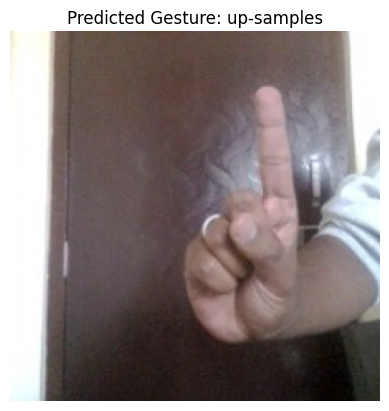

Predicted Gesture: up-samples


In [24]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch

# Define the transform to match training preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize the image
])

# Function to preprocess, visualize, and predict the gesture
def predict_image(image_path, model, label_map):
    # Load the image
    pil_image = Image.open(image_path).convert('RGB')  # Ensure it's RGB format
    
    # Apply the transformations
    input_image = transform(pil_image)
    
    # Visualize the transformed image
    img_to_display = input_image.clone()  # Clone for visualization
    img_to_display = img_to_display * 0.5 + 0.5  # Reverse normalization for display
    img_to_display = img_to_display.permute(1, 2, 0).numpy()  # Convert to HWC format for matplotlib
    
    # Perform inference
    input_tensor = input_image.unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        output = model(input_tensor)  # Get the model's predictions
        _, predicted_class = torch.max(output, 1)  # Get the class with the highest score
        predicted_label = label_map[predicted_class.item()]  # Map label to class name
    
    # Display the transformed image and the label
    plt.imshow(img_to_display)
    plt.title(f"Predicted Gesture: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label
label_map = {
    0: 'up-samples',
    1: 'mid-samples',
    2: 'down-samples'
}
# Example usage
# Replace 'model' with your trained PyTorch model and 'label_map' with your class mapping dictionary
image_path = '../input/hand-gestures/up-samples/25.jpg'  # Replace with your image
prediction = predict_image(image_path, model, label_map)

print(f'Predicted Gesture: {prediction}')
